In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#!pip install keras
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time
from collections import Counter

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [ ]:
data = pd.read_csv('SBTC - Sheet1.csv')

In [ ]:
print("Categories:")
print(data.final_label.unique())
category_list=data.final_label.unique()

Categories:
['Physics' 'Chemistry' 'Biology' 'ICT' 'Mathematics' 'Others']


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    text = re.sub(r'₀|₁|₂|₃|₄|₅|₆|₇|₈|₉', '', text)
    text = re.sub(r'⁰|¹|²|³|⁴|⁵|⁶|⁷|⁸|⁹|⁻|⁺|ⁿ|ᵗ', '', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-−[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰θ→°π∈∝α≤≥Δβε≠�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
data['cleantext'] = data.text.apply(lambda x: preprocessing(str(x)))
# print some cleaned reviews from the dataset
sample_data = range(5000,6000)
for i in sample_data:
  print(data.cleantext[i])

সনাতন বা আদিম সমাজে মানুষের জীবনযাপন ছিল অত্যন্ত সহজ সরল 
খাবার দাবার কাপড় চোপড় এবং বাড়িঘর এসবই ছিল মানুষের মৌলিক চাহিদা 
মূলত মানুষের কায়িক পরিশ্রম ছিল উৎপাদনের একমাত্র উপকরণ 
দশে মিলে করি কাজ হারিজিতি নাহি লাজ এই ছিল আদিম সমাজের মূলমন্ত্র
উৎপাদন ভোগ ও দৈনন্দিন সংসার পরিচালনার বিদ্যাকেই তখন অর্থনীতি বলা হতো
প্রাচীন ভারতে চতুর্থ খ্রিষ্টপূর্বে কৌটিল্যের অর্থশাস্ত্রে বৃহত্তর পরিসরে সারা দেশের রাজনীতি সমাজ অর্থনীতি ও সামরিক বিষয়ের উপর আলোকপাত করা হয়
দেশের ধনসম্পদ বৃদ্ধি রাষ্ট্রের ক্ষমতা বৃদ্ধি ও বাণিজ্য উদ্বৃত্তকরণের লক্ষ্যে ইংল্যান্ডের ব্যবসায়ীরা বেশি রপ্তানি করত এবং খুব সামান্যই আমদানি করত
ইংল্যান্ডের উৎপাদিত পণ্য পৃথিবীর বিভিন্ন দেশে প্রচুর পরিমাণে রপ্তানি করে মূল্যবান ধাতু সোনা রূপা হীরা ইত্যাদি আমদানি করা হতো 
অষ্টাদশ শতাব্দীর মধ্যভাগে ফরাসিরা সে দেশের ধনী মানুষের বিলাসী জীবনযাপন অতিরিক্ত করারোপ এবং ইংল্যান্ডের বাণিজ্যবাদের বিপক্ষে অবস্থান নিয়ে ভূমিবাদ মতবাদ প্রচার করেন 
ভূমিবাদীদের মতে কৃষিই খনি ও মৎসক্ষেত্রসহ হলো উৎপাদনশীল খাত
অন্যদিকে শিল্প ও বাণিজ্য উভয়ই অনুৎপাদনশীল খাত 

In [ ]:
stop =["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাথে","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
display(stop)

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
data['cleantext'] = data.cleantext.apply(lambda x: stopwordRemoval(str(x)))
#display(data.cleantext)
sample_data = range(0,1000)
for i in sample_data:
  print(data.cleantext[i])

ভৌত জগৎ মূলত চারটি উপাদানের সমন্বয়ে তৈরি স্থান কাল সময় ভর শক্তি
বলবিদ্যা বস্তুর বলের ক্রিয়া সংক্রান্ত বিষয় আলোচনা
পদার্থের ধর্ম বস্তুর গুণ আলোচনা
স্থিতিবিদ্যা স্থিতিশীল বস্তুর বলের ক্রিয়া আলোচনা
গতিবিদ্যা গতিশীল বস্তুর বলের ক্রিয়া আলোচনা
ধর্ম সকল পদার্থেরই কমবেশি পদার্থের ধর্ম ওজন বিস্তৃতি রোধ স্থিতিস্থাপকতা
ধর্ম সকল পদার্থের পদার্থের ধর্ম তারতা পাততা দৃঢ়তা ভঙ্গুরতা ধর্ম কেবলমাত্র কঠিন পদার্থের বেলায়
সান্দ্রতা তরল বায়বীয় পদার্থের ধর্ম
পৃষ্ঠটান তলটান তরল পদার্থের ধর্ম
তাপ একপ্রকার শক্তি বস্তুতে প্রয়োগ বস্তুটিকে গরম বস্তুটির তাপমাত্রা বৃদ্ধি পায় বর্জন তাপমাত্রা হ্রাস পায়
তত্ত্ব পরীক্ষানিরীক্ষার সাহায্যে প্রমাণিত মূল কথাগুলি উক্তির প্রকাশ বৈজ্ঞানিক সূত্র
সূত্র সময় আবিষ্কর্তার নামানুসারে ওমের সূত্র বয়েলের সূত্র কখনওবা বিষয়ের নামে শক্তির নিত্যতা সূত্র তাপগতিবিদ্যার সূত্র আবিষ্কারক বিষয় উভয়ের নামে নিউটনের গতিসূত্র গ্যালিলিওর পড়ন্ত বস্তুর সূত্র
সকল প্রাকৃতিক সত্য সরাসরি স্পষ্টভাবে প্রমাণ সত্যের সাহায্যে প্রাকৃতিক ঘটনাকে প্রমাণ নীতি
গাণিতিক মডেল সূত্র প্রতিষ্ঠা লক্ষ্যে পূর্ব

In [ ]:
data["label1"]=data.label1.replace({'Physics':0, 'Chemistry':1, 'Biology':2, 'ICT':3, 'Mathematics':4, 'Others':5})
data["label2"]=data.label2.replace({'Physics':0, 'Chemistry':1, 'Biology':2, 'ICT':3, 'Mathematics':4, 'Others':5})
data["label3"]=data.label3.replace({'Physics':0, 'Chemistry':1, 'Biology':2, 'ICT':3, 'Mathematics':4, 'Others':5})
data["final_label"]=data.final_label.replace({'Physics':0, 'Chemistry':1, 'Biology':2, 'ICT':3, 'Mathematics':4, 'Others':5})
print("First rows of dataset")
data.head()

First rows of dataset


,ID,text,source,cleantext,label1,label2,label3,final_label
0,1,ভৌত জগৎ মূলত চারটি উপাদানের সমন্বয়ে তৈরি- (১)...,HSC Physics,ভৌত জগৎ মূলত চারটি উপাদানের সমন্বয়ে তৈরি স্থা...,0,0,0,0
1,2,বলবিদ্যা বস্তুর উপর বলের ক্রিয়া সংক্রান্ত বিভ...,HSC Physics,বলবিদ্যা বস্তুর বলের ক্রিয়া সংক্রান্ত বিষয় আ...,0,0,0,0
2,3,পদার্থের ধর্ম বস্তুর বিভিন্ন গুণ আলোচনা করে।,HSC Physics,পদার্থের ধর্ম বস্তুর গুণ আলোচনা,0,0,0,0
3,4,স্থিতিবিদ্যা স্থিতিশীল বস্তুর উপর বলের ক্রিয়া...,HSC Physics,স্থিতিবিদ্যা স্থিতিশীল বস্তুর বলের ক্রিয়া আলোচনা,0,0,0,0
4,5,গতিবিদ্যা গতিশীল বস্তুর উপর বলের ক্রিয়া আলোচন...,HSC Physics,গতিবিদ্যা গতিশীল বস্তুর বলের ক্রিয়া আলোচনা,0,0,0,0


In [ ]:
# Drop single or multiple columns by specifying column names
data = data.drop(['text', 'source', 'label1', 'label2', 'label3'], axis=1)
data.head()

,ID,cleantext,final_label
0,1,ভৌত জগৎ মূলত চারটি উপাদানের সমন্বয়ে তৈরি স্থা...,0
1,2,বলবিদ্যা বস্তুর বলের ক্রিয়া সংক্রান্ত বিষয় আ...,0
2,3,পদার্থের ধর্ম বস্তুর গুণ আলোচনা,0
3,4,স্থিতিবিদ্যা স্থিতিশীল বস্তুর বলের ক্রিয়া আলোচনা,0
4,5,গতিবিদ্যা গতিশীল বস্তুর বলের ক্রিয়া আলোচনা,0


In [ ]:
# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (4200, 3)
Validation data shape: (900, 3)
Testing data shape: (900, 3)


In [ ]:
! pip install tensorboardX pandas simpletransformers transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix

# Create a custom dataset class for handling the data
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])  # Convert to string in case of numeric data
        label = self.labels.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        return input_ids, attention_mask, label

# Load indicBERT tokenizer and model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModelForSequenceClassification.from_pretrained('ai4bharat/indic-bert', num_labels=6)

# Add dropout layer to the model
dropout_prob = 0.1
model.config.attention_probs_dropout_prob = dropout_prob
model.config.hidden_dropout_prob = dropout_prob
model.to(device)

# Create data loaders for training, validation, and testing
max_length = 40
train_dataset = CustomDataset(train_data['cleantext'], train_data['final_label'], tokenizer, max_length)
val_dataset = CustomDataset(val_data['cleantext'], val_data['final_label'], tokenizer, max_length)
test_dataset = CustomDataset(test_data['cleantext'], test_data['final_label'], tokenizer, max_length)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define training and evaluation functions and train the model
num_epochs = 20
early_stopping_patience = 5
best_model_path = 'best_model.pt'
best_val_loss = float('inf')
current_patience = 0

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for input_ids, attention_mask, labels in train_loader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * input_ids.size(0)
        train_correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    train_loss /= len(train_dataset)
    train_accuracy = train_correct / len(train_dataset)

    # Evaluation on the validation set
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for input_ids, attention_mask, labels in val_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            val_loss += loss.item() * input_ids.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy for the epoch
    val_loss /= len(val_dataset)
    val_accuracy = val_correct / len(val_dataset)

    # Check for early stopping
    if val_loss < best_val_loss:
     best_val_loss = val_loss
     torch.save(model.state_dict(), best_model_path)
     current_patience = 0
    else:
      current_patience += 1
      if current_patience >= early_stopping_patience:
       print('Early stopping triggered.')
       break

    # Print the training and validation metrics for the epoch
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Load the best model
model.load_state_dict(torch.load(best_model_path))

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
test_correct = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for input_ids, attention_mask, labels in test_loader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)

        test_loss += loss.item() * input_ids.size(0)
        test_correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Calculate average test loss and accuracy
test_loss /= len(test_dataset)
test_accuracy = test_correct / len(test_dataset)

# Print the test metrics
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Calculate precision, recall, F1 score, and confusion matrix
class_names = ['Physics', 'Chemistry', 'Biology', 'ICT', 'Mathematics', 'Others']
print(classification_report(true_labels, predicted_labels, target_names=class_names))
confusion = confusion_matrix(true_labels, predicted_labels)
confusion_df = pd.DataFrame(confusion, index=class_names, columns=class_names)
print("Confusion Matrix:")
print(confusion_df)

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'sop_classifier.classifier.bias', 'sop_classifier.classifier.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

Epoch 1/20:
Training Loss: 1.7339, Training Accuracy: 0.2593
Validation Loss: 1.5989, Validation Accuracy: 0.3111
Epoch 2/20:
Training Loss: 1.4640, Training Accuracy: 0.3745
Validation Loss: 1.3782, Validation Accuracy: 0.4367
Epoch 3/20:
Training Loss: 1.1948, Training Accuracy: 0.5248
Validation Loss: 1.1723, Validation Accuracy: 0.5633
Epoch 4/20:
Training Loss: 0.9281, Training Accuracy: 0.6683
Validation Loss: 1.0179, Validation Accuracy: 0.6333
Epoch 5/20:
Training Loss: 0.6830, Training Accuracy: 0.7700
Validation Loss: 0.9275, Validation Accuracy: 0.6900
Epoch 6/20:
Training Loss: 0.4635, Training Accuracy: 0.8571
Validation Loss: 0.8128, Validation Accuracy: 0.7111
Epoch 7/20:
Training Loss: 0.3106, Training Accuracy: 0.9071
Validation Loss: 0.7057, Validation Accuracy: 0.7778
Epoch 8/20:
Training Loss: 0.2029, Training Accuracy: 0.9460
Validation Loss: 0.8121, Validation Accuracy: 0.7556
Epoch 9/20:
Training Loss: 0.1223, Training Accuracy: 0.9629
Validation Loss: 0.6809, Va

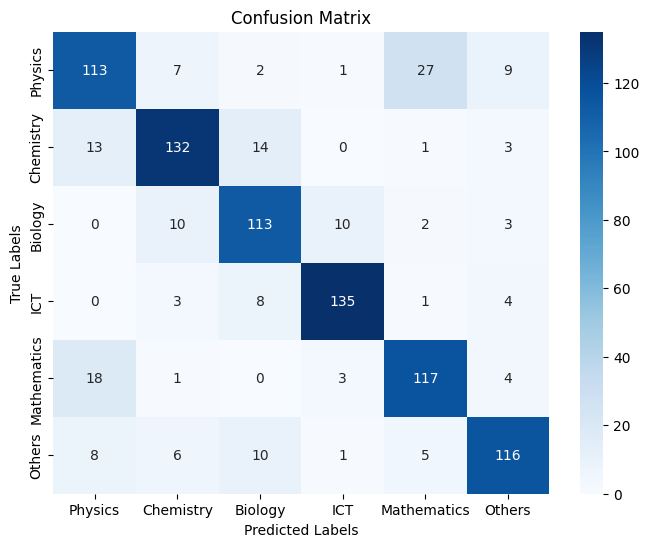

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()